In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
px.scatter(df,x='Age',y='EstimatedSalary',color='Purchased',symbol='Purchased')

<AxesSubplot:>

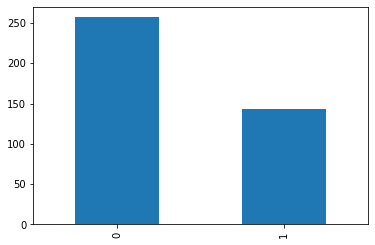

In [33]:
df.Purchased.value_counts().plot(kind='bar')

In [34]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [35]:
m = LogisticRegression()
m.fit(xtrain, ytrain)

LogisticRegression()

In [36]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

0.9

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
ypred = m.predict(xtest)

In [39]:
import seaborn as sns

In [40]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[54  2]
 [ 6 18]]


In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.90      0.75      0.82        24

    accuracy                           0.90        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80



### prediction

In [42]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


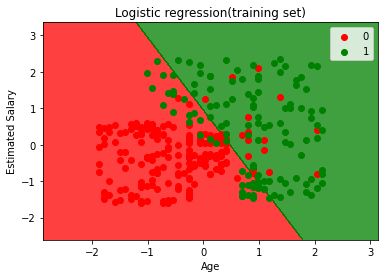

In [46]:
X_set,y_set=xtrain,ytrain
X1,X2=np.meshgrid(
    np.arange(
    start=X_set[:,0].min()-1,
    stop=X_set[:,0].max()+1,
    step=0.01),
    np.arange(start=X_set[:,1].min()-1,
    stop=X_set[:,1].max()+1,
    step=0.01)
)
plt.contourf(X1,X2,m.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic regression(training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


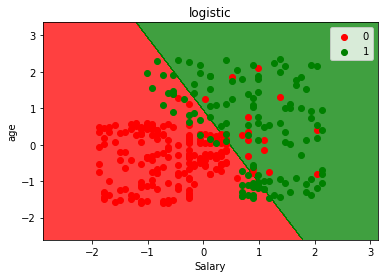

In [47]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')